# Term1 Project

### DataScience analysis of datset of the 1000 Movies - IMDB 

### Table of Contents

<ol type="1">
    <li><b><u>Problem Statement</u></b></li>
        <ul style="list-style-type:square;">
            <li>1.1 Hypothesis: Combination of best Director, and Genre generated higher revenue</li>
            <li>1.2 What is the revenue of movies for each Year</li>
            <li>1.3 What is the rating of movies for each Year and director</li>
            <li>1.4 Top Director which gave most Hit or Super Hit Movies</li>
            <li>1.5 What is the revenue of movies for each director</li>
            <li>1.6 What is the revenue of movies for each Genre</li>
            <li>1.7 What is the preference of the people for genre each year</li>
            <li>1.8 What is the revenue of movies for each genre and director</li>
        </ul>
    <li><b><u>Load Packages</u></b></li>
    <li><b><u>Load Data</u></b></li>
    <li><b><u>Pre Profiling Data</u></b></li>
    <li><b><u>Panda Profiling Data</u></b></li>
    <li><b><u>Profiling Data Observation</u></b></li>
    <li><b><u>Data Cleaning</u></b></li>
    <li><b><u>Analyzing Data with Questions</u></b></li>
    <li><b><u>Conclusion</u></b></li>
</ol>

<B><I><U>Import Required Packages</U></I></B>

In [1]:
import numpy as np          # Import Numpy Package
import pandas as pd         # Import Pandas Package
import pandas_profiling     # Import Pandas Profiling Package

import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

from pandas.tools.plotting import table

import seaborn as sns

%matplotlib inline

sns.set()

from subprocess import check_output

<B><I><U>Load Data</U></I></B>

In [2]:
# Importing dataset using pd.read_csv
movie_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")

<B><I><U>Pre Profiling Data</U></I></B>

<p>
    Checking basic info of the dataset like, Columns, Shape etc.
</p>

In [3]:
movie_data.shape

(1000, 12)

In [4]:
movie_data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [5]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
movie_data.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [8]:
# Describe the Dataset
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
# Get Sum of the Null data of each column in Dataset
movie_data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [10]:
# Show random sample from the Dataset
movie_data.sample(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
867,868,The Stanford Prison Experiment,"Biography,Drama,History",Twenty-four male students out of seventy-five ...,Kyle Patrick Alvarez,"Ezra Miller, Tye Sheridan, Billy Crudup, Olivi...",2015,122,6.9,20907,0.64,67.0
315,316,Snowpiercer,"Action,Drama,Sci-Fi",Set in a future where a failed climate-change ...,Bong Joon Ho,"Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris",2013,126,7.0,199048,4.56,84.0
31,32,Nocturnal Animals,"Drama,Thriller",A wealthy art gallery owner is haunted by her ...,Tom Ford,"Amy Adams, Jake Gyllenhaal, Michael Shannon, A...",2016,116,7.5,126030,10.64,67.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
709,710,Closed Circuit,"Crime,Drama,Mystery",A high-profile terrorism case unexpectedly bin...,John Crowley,"Eric Bana, Rebecca Hall, Jim Broadbent, Ciarán...",2013,96,6.2,18437,5.73,50.0
137,138,The Great Gatsby,"Drama,Romance","A writer and wall street trader, Nick, finds h...",Baz Luhrmann,"Leonardo DiCaprio, Carey Mulligan, Joel Edgert...",2013,143,7.3,386102,144.81,55.0
210,211,San Andreas,"Action,Adventure,Drama",In the aftermath of a massive earthquake in Ca...,Brad Peyton,"Dwayne Johnson, Carla Gugino, Alexandra Daddar...",2015,114,6.1,161396,155.18,43.0
471,472,Marie Antoinette,"Biography,Drama,History",The retelling of France's iconic but ill-fated...,Sofia Coppola,"Kirsten Dunst, Jason Schwartzman, Rip Torn, Ju...",2006,123,6.4,83941,15.96,65.0
277,278,Zodiac,"Crime,Drama,History","In the late 1960s/early 1970s, a San Francisco...",David Fincher,"Jake Gyllenhaal, Robert Downey Jr., Mark Ruffa...",2007,157,7.7,329683,33.05,78.0
582,583,Sex Tape,"Comedy,Romance",A married couple wake up to discover that the ...,Jake Kasdan,"Jason Segel, Cameron Diaz, Rob Corddry, Ellie ...",2014,94,5.1,89885,38.54,36.0


<B><I><U>Pandas Profiling Data</U></I></B>

In [11]:
# Get a quick overview for all the variables using pandas_profiling and download the HTML file in our workspace
profile = pandas_profiling.ProfileReport(movie_data)
profile.to_file(outputfile="movie_data_pp_output.html")

TypeError: to_file() got an unexpected keyword argument 'outputfile'

<B><I><U>Profiling Data Observation</U></I></B>

Revenue has around 12.8% data missing. 
Metascore has around 6.4% data missing. 
Year is in range of 2006 to 2016. 
Title has combination of both numeric and text based.

We need to clean Revenue and Metascore data.
For Revenue missing values will be replaced with median value.
For Metascore missing values will be replaced with median value.

<B><I><U>Data Cleaning</U></I></B>

In [5]:
movie_data.rename(columns={'Revenue (Millions)': 'Revenue', 'Runtime (Minutes)': 'RunTime_Min'}, inplace=True)
movie_data.rename(columns={'Revenue_(Millions)': 'Revenue', 'Runtime_(Minutes)': 'RunTime_Min'}, inplace=True)
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,RunTime_Min,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [6]:
median_revenue = movie_data.Revenue.median()
movie_data.Revenue.fillna(median_revenue, inplace = True)
median_revenue

47.985

In [7]:
median_metascore = movie_data.Metascore.median()
movie_data.Metascore.fillna(median_metascore, inplace = True)
median_metascore

59.5

In [8]:
movie_data['Hit_Flop'] = movie_data.apply(lambda x: 'Flop' if x['Rating'] <= 3 else('Average' if x['Rating'] < 5 else('Hit' if x['Rating'] <= 7 else 'Super Hit')), axis=1)

In [9]:
movie_data['Critic_Verdit'] = movie_data.apply(lambda x: 'Flop' if x['Metascore'] <= 35 else('Average' if x['Metascore'] < 55 else('Hit' if x['Metascore'] <= 75 else 'Super Hit')), axis=1)

In [10]:
for i in range(10,0,-1):
        movie_data.loc[ movie_data['Rating'] <= i, 'Rating_bin'] = i

In [11]:
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,RunTime_Min,Rating,Votes,Revenue,Metascore,Hit_Flop,Critic_Verdit,Rating_bin
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130,76.0,Super Hit,Super Hit,9.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460,65.0,Hit,Hit,7.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120,62.0,Super Hit,Hit,8.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320,59.0,Super Hit,Hit,8.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020,40.0,Hit,Average,7.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130,42.0,Hit,Average,7.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060,93.0,Super Hit,Super Hit,9.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,47.985,71.0,Hit,Hit,7.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010,78.0,Super Hit,Super Hit,8.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010,41.0,Hit,Average,7.0


<B><I><U>Analyzing Data with Questions</U></I></B>

#### Correlation between Year and Revenue
<br/>
Let's get the Year wise revenue

Text(0, 0.5, 'Revenue Total')

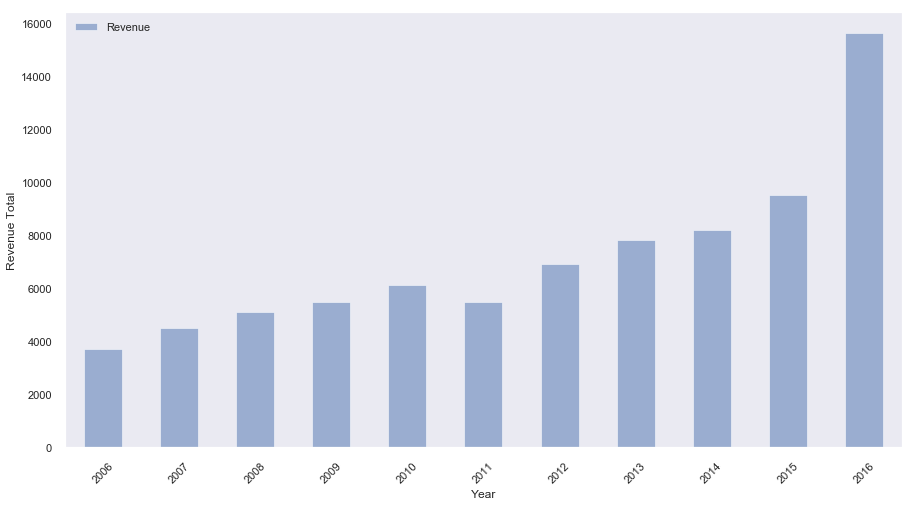

In [12]:
yearly_revenue = movie_data[["Year", "Revenue"]]
yearly_rev_plot = yearly_revenue.groupby("Year").sum().plot(kind="bar", color='b', alpha=0.5, grid=False, rot=45, figsize=(15,8))
yearly_rev_plot.set_xlabel("Year") #X-axis label
yearly_rev_plot.set_ylabel("Revenue Total") #y-axis label

As we can see the for the Year 2016, has the highest revenue.
<br/><br/>
#### Correlation between Year and Movie Count
<br/>
Let's get the No of movie released in a Year

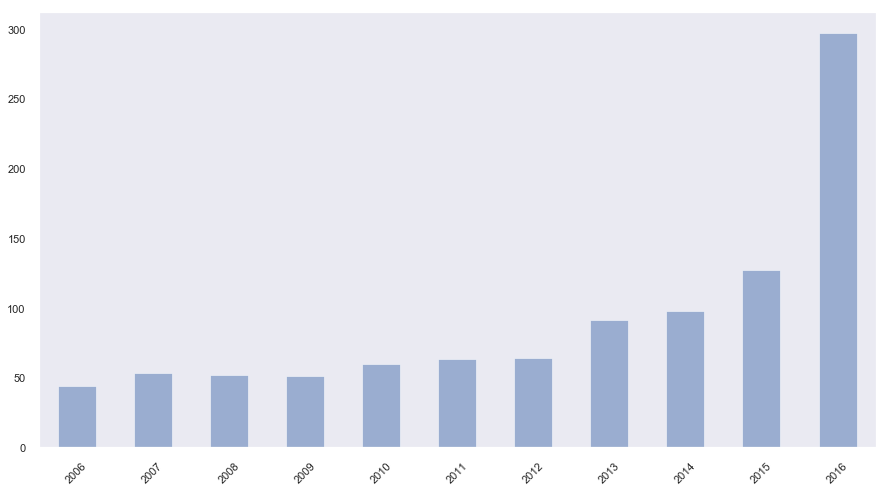

In [13]:
plt.figure(figsize=(15,8))
movie_yearly_count = movie_data['Year'].value_counts().sort_index().plot(kind='bar', color='b', alpha=0.5, grid=False, rot=45)

As we can see the for the Year 2016, more no of movies were launched. 
<BR/><BR/>

#### Correlation between Hit_Flop and Revenue

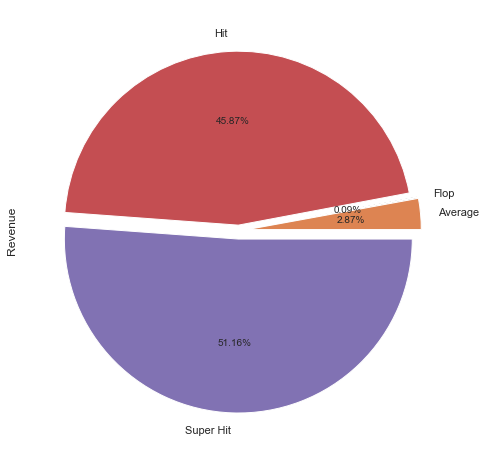

In [14]:
explode = (0.05, 0.04, 0.03, 0.05)
colors = ['C1','black','C3','C4']
movie_data[["Hit_Flop", "Revenue"]].groupby("Hit_Flop").sum().plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.show()

From above Pie Chart, we can imply for Flop movie have lowest Revenue % and Super Hit movies has Highest Revenue %
<BR/><BR/>
#### Correlation between Critic_Verdit and Revenue

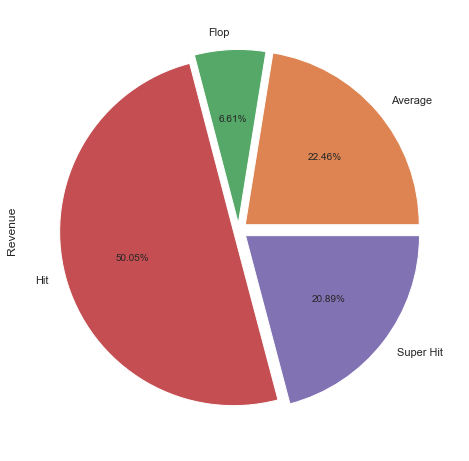

In [15]:
explode = (0.05, 0.04, 0.03, 0.05)
colors = ['C1','C2','C3','C4']
movie_data[["Critic_Verdit", "Revenue"]].groupby("Critic_Verdit").sum().plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.show()

From above Pie Chart, we can imply for Crtic Rating as Flop movie have lowest Revenue % and Critic Rating with Hit has Highest %
<BR/><BR/>

#### Correlation between Voters and Hit_Flop

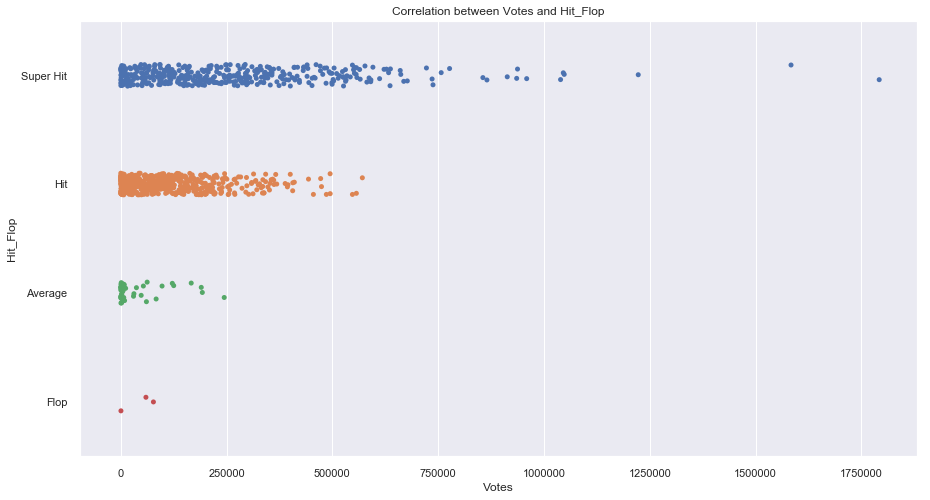

In [16]:
plt.figure(figsize=(15,8))
sns.stripplot(x="Votes", y="Hit_Flop", data=movie_data).set_title("Correlation between Votes and Hit_Flop")
plt.show()

#### Rating Spread

C:\Users\amsheth\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


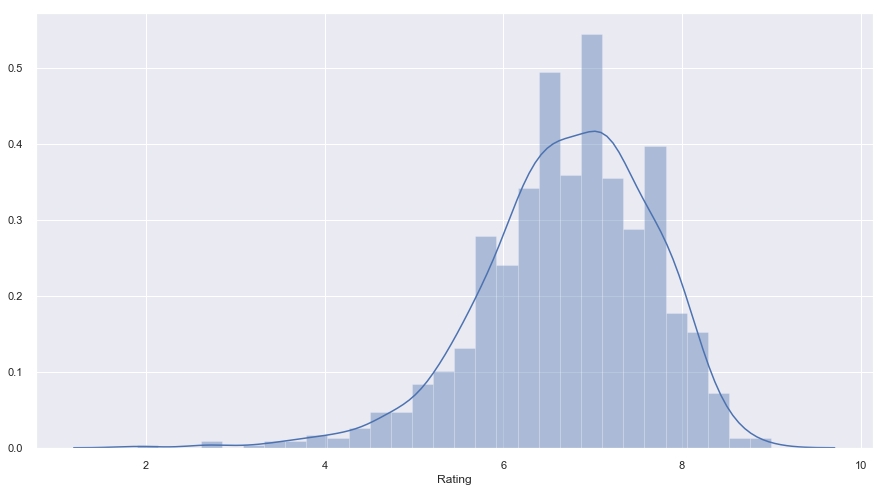

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(movie_data.Rating, hist_kws = dict(edgecolor='w', linewidth=0.5))

Most of the movies got Rating bewtween 6 to 8
<BR/><BR/>
#### Top 20 Director with Max Revenue

In [18]:
director_revenue = movie_data[["Director", "Revenue"]]
director_revenue1 = director_revenue.groupby("Director", sort=False).sum().reset_index()
director_revenue1.sort_values("Revenue", ascending=False, inplace=True)
director_revenue_final = director_revenue1.head(20)
director_revenue_final

,Director,Revenue
50,J.J. Abrams,1683.45
10,David Yates,1630.51
36,Christopher Nolan,1515.09
110,Michael Bay,1421.32
303,Francis Lawrence,1299.81
73,Joss Whedon,1082.27
109,Jon Favreau,1025.60
59,Zack Snyder,975.74
216,Peter Jackson,860.45
72,Gore Verbinski,829.82



#### Top 20 Director of Maximum Revenue, get the List of Hit_Flop Count

In [19]:
director_HitFlop = movie_data.loc[movie_data["Director"].isin(director_revenue_final["Director"])]
director_HitFlop1 = director_HitFlop[["Director", "Hit_Flop"]]
director_HitFlopFinal = director_HitFlop1.pivot_table(index="Director", columns="Hit_Flop", aggfunc=len, fill_value=0)
director_HitFlopFinal

Hit_Flop,Hit,Super Hit
Director,,
Andrew Stanton,1,2
Anthony Russo,0,2
Christopher Nolan,0,5
Clint Eastwood,0,4
Colin Trevorrow,1,0
David Yates,1,5
Francis Lawrence,2,2
Gareth Edwards,1,1
Gore Verbinski,2,2



#### Top 20 Director of Hit_Flop wise Revenue

In [20]:
director_Rev = director_HitFlop[["Director", "Hit_Flop", "Revenue"]]
director_HitFlopRev = director_Rev.pivot_table(index="Director", columns="Hit_Flop", values="Revenue", aggfunc=sum, fill_value=0)
director_HitFlopRev.rename(columns={'Hit': 'Revenue_Hit', 'Super Hit': 'Revenue_SuperHit'}, inplace=True)
director_HitFlopRev

Hit_Flop,Revenue_Hit,Revenue_SuperHit
Director,,
Andrew Stanton,73.06,710.10
Anthony Russo,0.00,667.83
Christopher Nolan,0.00,1515.09
Clint Eastwood,0.00,658.99
Colin Trevorrow,652.18,0.00
David Yates,126.59,1503.92
Francis Lawrence,618.77,681.04
Gareth Edwards,200.66,532.17
Gore Verbinski,97.39,732.43


In [21]:
director_Rev_HitFlop = pd.merge(director_revenue_final, director_HitFlopFinal, on = "Director", how='inner')
director_Rev_HitFlop = pd.merge(director_Rev_HitFlop, director_HitFlopRev, on = "Director", how='inner')
director_Rev_HitFlop

,Director,Revenue,Hit,Super Hit,Revenue_Hit,Revenue_SuperHit
0,J.J. Abrams,1683.45,1,4,133.38,1550.07
1,David Yates,1630.51,1,5,126.59,1503.92
2,Christopher Nolan,1515.09,0,5,0.00,1515.09
3,Michael Bay,1421.32,4,2,1049.74,371.58
4,Francis Lawrence,1299.81,2,2,618.77,681.04
5,Joss Whedon,1082.27,0,2,0.00,1082.27
6,Jon Favreau,1025.60,1,3,312.06,713.54
7,Zack Snyder,975.74,2,3,366.63,609.11
8,Peter Jackson,860.45,1,3,43.98,816.47
9,Gore Verbinski,829.82,2,2,97.39,732.43


In [22]:
director_Top = director_revenue_final.head(5)
#director_Top
director_HitFlop_1 = movie_data.loc[movie_data["Director"].isin(director_Top["Director"])]
director_HitFlop_T = director_HitFlop_1[["Director", "Hit_Flop", "Revenue", "Critic_Verdit", "Rating_bin"]]
director_HitFlop_T.shape

(26, 5)

In [23]:
director_HitFlop_T

,Director,Hit_Flop,Revenue,Critic_Verdit,Rating_bin
10,David Yates,Super Hit,234.02,Hit,8.0
36,Christopher Nolan,Super Hit,187.99,Hit,9.0
50,J.J. Abrams,Super Hit,936.63,Super Hit,9.0
54,Christopher Nolan,Super Hit,533.32,Super Hit,9.0
64,Christopher Nolan,Super Hit,53.08,Hit,9.0
80,Christopher Nolan,Super Hit,292.57,Hit,9.0
107,David Yates,Hit,126.59,Average,7.0
114,David Yates,Super Hit,380.96,Super Hit,9.0
124,Christopher Nolan,Super Hit,448.13,Super Hit,9.0
126,Michael Bay,Hit,245.43,Flop,6.0



#### Top 5 Director of wise Rating

Text(0.5, 1.0, 'Top 5 Director Vs. Rating Cumulative')

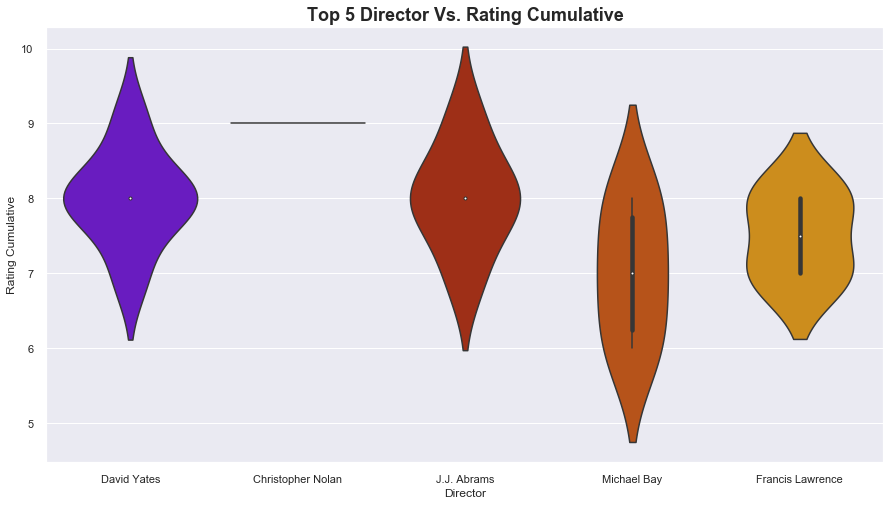

In [24]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="Director", y="Rating_bin", palette="gnuplot", data=director_HitFlop_T)
plt.xlabel("Director")
plt.ylabel("Rating Cumulative")
plt.title("Top 5 Director Vs. Rating Cumulative", fontsize=18, fontweight = "bold")

In [25]:
director_HitFlop_T = director_HitFlop[["Director", "Hit_Flop", "Revenue", "Critic_Verdit", "Rating_bin", "Genre"]]
director_HitFlop_T.shape

(77, 6)

In [26]:
director_HitFlop_T

,Director,Hit_Flop,Revenue,Critic_Verdit,Rating_bin,Genre
1,Ridley Scott,Hit,126.46,Hit,7.0,"Adventure,Mystery,Sci-Fi"
10,David Yates,Super Hit,234.02,Hit,8.0,"Adventure,Family,Fantasy"
12,Gareth Edwards,Super Hit,532.17,Hit,8.0,"Action,Adventure,Sci-Fi"
35,Anthony Russo,Super Hit,408.08,Hit,8.0,"Action,Adventure,Sci-Fi"
36,Christopher Nolan,Super Hit,187.99,Hit,9.0,"Adventure,Drama,Sci-Fi"
48,Justin Lin,Super Hit,158.80,Hit,8.0,"Action,Adventure,Sci-Fi"
50,J.J. Abrams,Super Hit,936.63,Super Hit,9.0,"Action,Adventure,Fantasy"
54,Christopher Nolan,Super Hit,533.32,Super Hit,9.0,"Action,Crime,Drama"
59,Clint Eastwood,Super Hit,125.07,Hit,8.0,"Biography,Drama"
60,Zack Snyder,Hit,330.25,Average,7.0,"Action,Adventure,Sci-Fi"


In [27]:
director_genre = movie_data[["Director", "Genre"]]
director_genre1 = director_genre.groupby("Director", sort=False).count().reset_index()
director_genre1.sort_values("Genre", ascending=False, inplace=True)
director_Gen_1 = movie_data.loc[movie_data["Director"].isin(director_revenue_final["Director"])]

director_genreF = director_Gen_1[["Director", "Hit_Flop", "Revenue", "Critic_Verdit", "Rating_bin", "Genre"]]
#director_HitFlopFinal = director_HitFlop1.pivot_table(index="Director", columns="Hit_Flop", aggfunc=len, fill_value=0)
director_genreF[["Genre1", "Genre2", "Genre3"]] = director_genreF["Genre"].str.split(",",expand=True,)
director_genreF

C:\Users\amsheth\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Director,Hit_Flop,Revenue,Critic_Verdit,Rating_bin,Genre,Genre1,Genre2,Genre3
1,Ridley Scott,Hit,126.46,Hit,7.0,"Adventure,Mystery,Sci-Fi",Adventure,Mystery,Sci-Fi
10,David Yates,Super Hit,234.02,Hit,8.0,"Adventure,Family,Fantasy",Adventure,Family,Fantasy
12,Gareth Edwards,Super Hit,532.17,Hit,8.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
35,Anthony Russo,Super Hit,408.08,Hit,8.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
36,Christopher Nolan,Super Hit,187.99,Hit,9.0,"Adventure,Drama,Sci-Fi",Adventure,Drama,Sci-Fi
48,Justin Lin,Super Hit,158.80,Hit,8.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
50,J.J. Abrams,Super Hit,936.63,Super Hit,9.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
54,Christopher Nolan,Super Hit,533.32,Super Hit,9.0,"Action,Crime,Drama",Action,Crime,Drama
59,Clint Eastwood,Super Hit,125.07,Hit,8.0,"Biography,Drama",Biography,Drama,None
60,Zack Snyder,Hit,330.25,Average,7.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi



#### Yearly Genre wise movie Count

In [56]:
genres = movie_data['Genre'].unique()
genre_list = [y for x in genres for y in x.split(",")]
genre_list = set(genre_list)
genre_list

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [104]:
year_genre = movie_data[["Year", "Genre"]]
yearList = movie_data['Year'].tolist()
yearList = list(set(yearList))
newDFDict = {}
for genre in genre_list:
    current_genre = year_genre['Genre'].str.contains(genre).fillna(False)
    data = {genre: pd.Series(year_genre[current_genre].Year.value_counts(), index=yearList)}
    newDFDict.update(data)
    
yearGenreDF = pd.DataFrame(newDFDict).fillna(0)
yearGenreDF.reset_index(inplace=True)
yearGenreDF.rename(columns={'index': 'Year'}, inplace=True)
yearGenreDF = yearGenreDF.melt(id_vars=['Year'], var_name='Genre', value_name='Count')
yearGenreDF

,Year,Genre,Count
0,2016,Action,75.0
1,2006,Action,11.0
2,2007,Action,12.0
3,2008,Action,24.0
4,2009,Action,14.0
5,2010,Action,25.0
6,2011,Action,20.0
7,2012,Action,21.0
8,2013,Action,29.0
9,2014,Action,37.0


C:\Users\amsheth\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\amsheth\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Factorplot for Yearly count of movie for each Genre')

<Figure size 3240x3240 with 0 Axes>

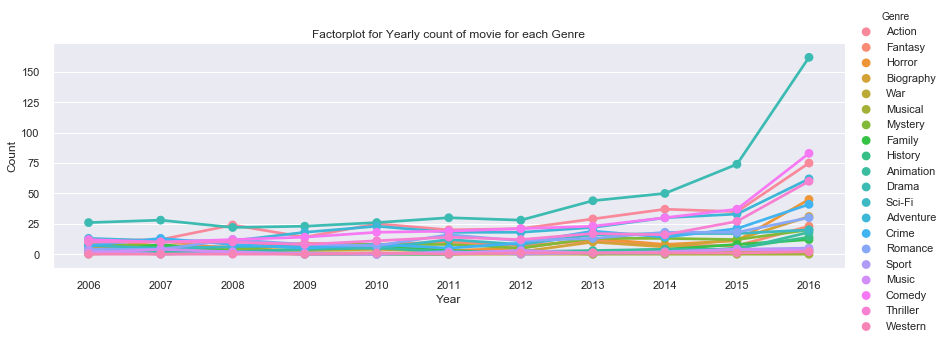

In [119]:
plt.figure(figsize=(45,45))
sns.factorplot('Year','Count', data=yearGenreDF, hue='Genre', size=4, aspect=3)
plt.title('Factorplot for Yearly count of movie for each Genre')

Text(0, 0.5, 'Revenue Total')

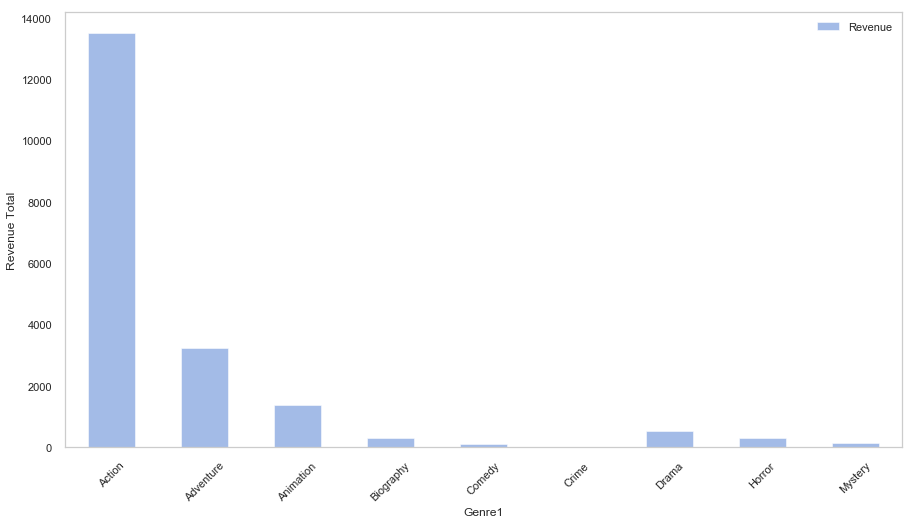

In [131]:
director_genreF[["Genre1", "Revenue"]]
gen_rev = director_genreF[["Genre1", "Revenue"]]
gen_rev_plot = gen_rev.groupby("Genre1").sum().plot(kind="bar", color='b', alpha=0.5, grid=False, rot=45, figsize=(15,8))
gen_rev_plot.set_xlabel("Genre1") #X-axis label
gen_rev_plot.set_ylabel("Revenue Total") #y-axis label

## Conclusion

1. Revenue is dependent of Genre, Director <br/>
2. Rating is dependent of Genre, Director <br/>
3. Action genre is more popular and genrates the higher revenue <br/>
4. 2016 had higher release of movies